In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import data

In [5]:
df = pd.read_csv(r'C:\Users\ahame\Downloads\mymoviedb.csv', encoding='latin1', lineterminator='\n')
#utf-8: Default for read_csv, but strict. Fails on some special characters.

#latin1 / cp1252: More permissive. Often used on Windows-created CSVs.

#lineterminator='\n': Optional, but sometimes needed if line breaks are non-standard.

In [7]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [9]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [11]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [15]:
df.duplicated().sum()

0

In [17]:
df.describe()

#the dataframe above taken has rows = 9827 and columns = 9
#there are no NaNs or duplicate vales

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Performing data pre-processing
#1. release date should be changed to date time format and extract only year
#2. overview, original language and poster_url are not required
#3. there are noticable outliers in the popularity column
#4. vote_average should be categorised properly
#5. genre column has comma separated values and white spaces that needs to be handled and casted into category.Exploration summary

In [19]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']) #to convert into datetime 

print(df['Release_Date'].dtypes)

datetime64[ns]


In [21]:
df['Release_Date'] = df['Release_Date'].dt.year #to convert only into year

print(df['Release_Date'].dtypes)

int32


In [23]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping columns not req.

In [25]:
cols = ['Overview','Original_Language','Poster_Url']

df.drop(cols, axis=1, inplace=True, errors='ignore')#just writing errors line to make sure no errors are shown

In [27]:
print(df.columns.tolist())

['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre']


In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorizing the Vote_Average column to make them into 4 different types of categories:
#1 popular
#2 average
#3 below average
#4 not popular

In [31]:
def categorize_col(df, col, labels):    #my user defined function to help categorize 
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]  #used to categorize the data acoordingly

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')  #the 'cut' function is used for the categorization of the data

    return df        

In [33]:
labels = ['not popular', 'below average', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below average', 'average', 'not popular', NaN]
Categories (4, object): ['not popular' < 'below average' < 'average' < 'popular']

In [35]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [37]:
df['Vote_Average'].value_counts()

Vote_Average
not popular      2467
popular          2450
average          2412
below average    2398
Name: count, dtype: int64

In [39]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

Now we will split the genre into a list and then explode the data frame to have only 1 genre per row for each movie

In [41]:
df['Genre'] = df['Genre'].astype(str).str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


In [45]:
df.nunique() #pre-processing has been completed

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visulaization

In [48]:
sns.set_style('whitegrid')

In [50]:
#Most frequent genre released on netflix

df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

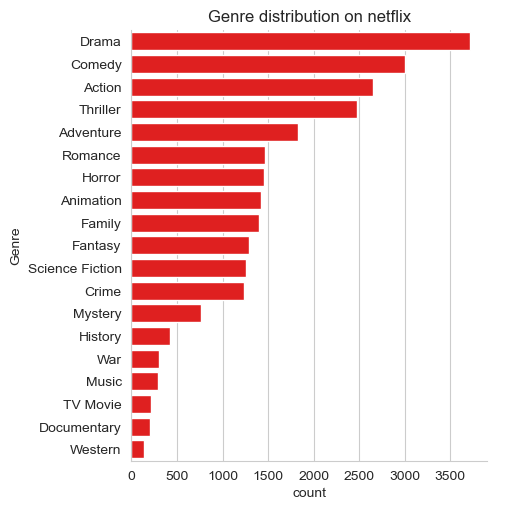

In [54]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = 'red')

plt.title('Genre distribution on netflix')
plt.show()

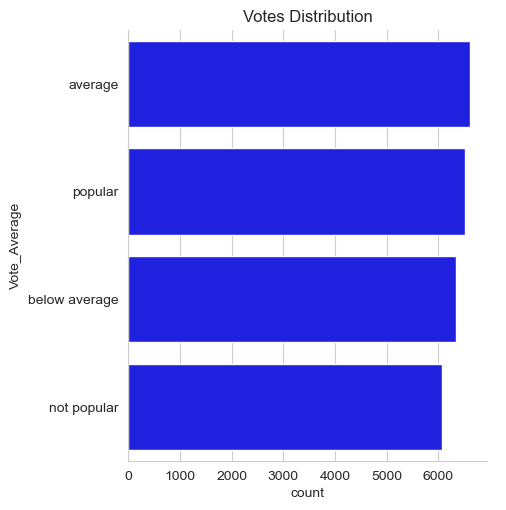

In [56]:
#Highest votes in the vote avg column

sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = 'blue')

plt.title('Votes Distribution')
plt.show()

In [65]:
#Movie with highest popularity and its genre

df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [67]:
#Movie with lowest popularity and its genre

df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


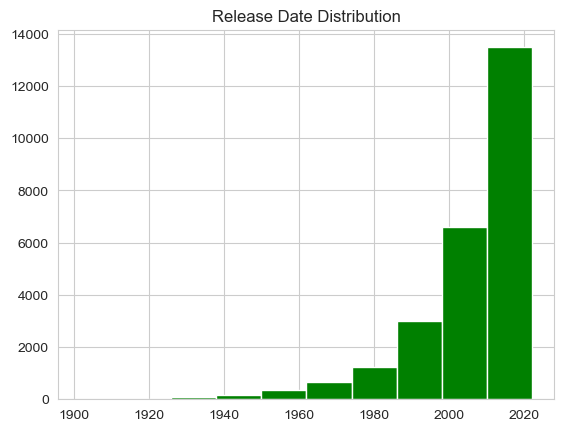

In [71]:
#Year with most releases

df['Release_Date'].hist(color = 'green')
plt.title('Release Date Distribution')
plt.show()

Conclusions:
1. Drama genre is most frequent with 3715 entries 
2. Most of the movies are rated average
3. Spiderman No way home has highest popularity
4. The United States vs. Billie Holiday and Threads has lowest popularity
5. Most movies were released in the year 2019-20 with 2020 being highest